# Семинар 2

## План ноутбука

1. Высокоуровневое API для обучение нейросетей в `PyTorch`
2. Обучение первой нейросети в `PyTorch`

## Высокоуровневое API для обучение нейросетей в `PyTorch`

In [5]:
import torch
import torch.nn as nn

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Создание объекта нейросети

In [7]:
net = nn.Sequential(
    nn.Linear(700, 500),
    nn.ReLU(),
    nn.Linear(500, 200),
    nn.ReLU(),
    nn.Linear(200, 10)
)

In [8]:
net

Sequential(
  (0): Linear(in_features=700, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=10, bias=True)
)

In [10]:
net[1]

ReLU()

In [12]:
x = torch.rand(1, 700)

net(x)

tensor([[-0.1412,  0.0074, -0.0167,  0.0939, -0.0294,  0.0939, -0.0387, -0.1157,
         -0.1341, -0.0507]], grad_fn=<AddmmBackward0>)

In [13]:
from collections import OrderedDict

net = nn.Sequential(
    OrderedDict(
        [
            ('linear1', nn.Linear(700, 500)),
            ('relu1', nn.ReLU()),
            ('linear2', nn.Linear(500, 200)),
            ('relu2', nn.ReLU()),
            ('linear3', nn.Linear(200, 10))
        ]
    )
)

In [14]:
net

Sequential(
  (linear1): Linear(in_features=700, out_features=500, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=500, out_features=200, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=200, out_features=10, bias=True)
)

In [15]:
net.linear1

Linear(in_features=700, out_features=500, bias=True)

In [16]:
input_tensor = torch.rand(6, 700)

net(input_tensor).shape

torch.Size([6, 10])

In [17]:
# необходимо отнаследоваться от nn.Module и определить методы __init__ и forward

class CustomTaskNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear1 = nn.Linear(700, 500)
        self.linear2 = nn.Linear(500, 500)
        self.linear3 = nn.Linear(500, 10)

        self.activation = nn.ReLU()

    def forward(self, x):
        output = self.activation(self.linear1(x))
        output = self.activation(self.linear2(output))
        output = self.linear3(output)

        return output

In [19]:
net = CustomTaskNetwork()
net

CustomTaskNetwork(
  (linear1): Linear(in_features=700, out_features=500, bias=True)
  (linear2): Linear(in_features=500, out_features=500, bias=True)
  (linear3): Linear(in_features=500, out_features=10, bias=True)
  (activation): ReLU()
)

In [21]:
net.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-0.0046, -0.0147, -0.0108,  ..., -0.0097, -0.0142, -0.0183],
                      [-0.0269,  0.0245,  0.0160,  ...,  0.0221,  0.0033, -0.0027],
                      [-0.0318, -0.0120, -0.0059,  ..., -0.0002, -0.0039,  0.0289],
                      ...,
                      [ 0.0335, -0.0154, -0.0097,  ..., -0.0269,  0.0093, -0.0069],
                      [ 0.0231, -0.0092,  0.0288,  ...,  0.0022,  0.0373,  0.0132],
                      [ 0.0060, -0.0098, -0.0267,  ..., -0.0337,  0.0169, -0.0013]])),
             ('linear1.bias',
              tensor([-2.1088e-02,  1.0055e-02, -7.7552e-03, -1.9122e-02, -3.3471e-02,
                      -2.0890e-02,  1.7957e-02,  2.6099e-02,  3.0136e-02, -3.0112e-02,
                       2.7849e-02, -1.2145e-02, -2.8552e-02,  1.0605e-02, -7.8391e-03,
                      -2.5345e-02,  6.5207e-03,  3.5297e-02,  1.6740e-02,  6.9777e-03,
                      -3.3125e-02,  1.8327e-02,  1.6675e

In [22]:
torch.save(net.state_dict(), "model.pt")

In [23]:
net.load_state_dict(torch.load("model.pt"))

<ipython-input-23-daa6e0a94d49>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load("model.pt"))


<All keys matched successfully>

In [24]:
net(input_tensor).shape

torch.Size([6, 10])

In [25]:
# net.to(torch.device('cuda:0'))
net.to(device)

CustomTaskNetwork(
  (linear1): Linear(in_features=700, out_features=500, bias=True)
  (linear2): Linear(in_features=500, out_features=500, bias=True)
  (linear3): Linear(in_features=500, out_features=10, bias=True)
  (activation): ReLU()
)

In [26]:
net.linear1.weight.device

device(type='cuda', index=0)

In [27]:
net(input_tensor).shape

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [28]:
net(input_tensor.cuda()).shape

torch.Size([6, 10])

In [29]:
net.cpu()

CustomTaskNetwork(
  (linear1): Linear(in_features=700, out_features=500, bias=True)
  (linear2): Linear(in_features=500, out_features=500, bias=True)
  (linear3): Linear(in_features=500, out_features=10, bias=True)
  (activation): ReLU()
)

In [30]:
net.train()

CustomTaskNetwork(
  (linear1): Linear(in_features=700, out_features=500, bias=True)
  (linear2): Linear(in_features=500, out_features=500, bias=True)
  (linear3): Linear(in_features=500, out_features=10, bias=True)
  (activation): ReLU()
)

In [31]:
net.training

True

In [32]:
net.eval()

CustomTaskNetwork(
  (linear1): Linear(in_features=700, out_features=500, bias=True)
  (linear2): Linear(in_features=500, out_features=500, bias=True)
  (linear3): Linear(in_features=500, out_features=10, bias=True)
  (activation): ReLU()
)

In [33]:
net.training

False

In [34]:
net.linear1.weight

Parameter containing:
tensor([[-0.0046, -0.0147, -0.0108,  ..., -0.0097, -0.0142, -0.0183],
        [-0.0269,  0.0245,  0.0160,  ...,  0.0221,  0.0033, -0.0027],
        [-0.0318, -0.0120, -0.0059,  ..., -0.0002, -0.0039,  0.0289],
        ...,
        [ 0.0335, -0.0154, -0.0097,  ..., -0.0269,  0.0093, -0.0069],
        [ 0.0231, -0.0092,  0.0288,  ...,  0.0022,  0.0373,  0.0132],
        [ 0.0060, -0.0098, -0.0267,  ..., -0.0337,  0.0169, -0.0013]],
       requires_grad=True)

In [35]:
list(net.parameters())

[Parameter containing:
 tensor([[-0.0046, -0.0147, -0.0108,  ..., -0.0097, -0.0142, -0.0183],
         [-0.0269,  0.0245,  0.0160,  ...,  0.0221,  0.0033, -0.0027],
         [-0.0318, -0.0120, -0.0059,  ..., -0.0002, -0.0039,  0.0289],
         ...,
         [ 0.0335, -0.0154, -0.0097,  ..., -0.0269,  0.0093, -0.0069],
         [ 0.0231, -0.0092,  0.0288,  ...,  0.0022,  0.0373,  0.0132],
         [ 0.0060, -0.0098, -0.0267,  ..., -0.0337,  0.0169, -0.0013]],
        requires_grad=True),
 Parameter containing:
 tensor([-2.1088e-02,  1.0055e-02, -7.7552e-03, -1.9122e-02, -3.3471e-02,
         -2.0890e-02,  1.7957e-02,  2.6099e-02,  3.0136e-02, -3.0112e-02,
          2.7849e-02, -1.2145e-02, -2.8552e-02,  1.0605e-02, -7.8391e-03,
         -2.5345e-02,  6.5207e-03,  3.5297e-02,  1.6740e-02,  6.9777e-03,
         -3.3125e-02,  1.8327e-02,  1.6675e-02,  1.7545e-02,  7.4183e-03,
         -3.3241e-02,  6.3233e-03, -1.6696e-02, -1.5523e-02, -2.8453e-02,
          6.5478e-03,  2.4674e-02, -3.03

In [36]:
net.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-0.0046, -0.0147, -0.0108,  ..., -0.0097, -0.0142, -0.0183],
                      [-0.0269,  0.0245,  0.0160,  ...,  0.0221,  0.0033, -0.0027],
                      [-0.0318, -0.0120, -0.0059,  ..., -0.0002, -0.0039,  0.0289],
                      ...,
                      [ 0.0335, -0.0154, -0.0097,  ..., -0.0269,  0.0093, -0.0069],
                      [ 0.0231, -0.0092,  0.0288,  ...,  0.0022,  0.0373,  0.0132],
                      [ 0.0060, -0.0098, -0.0267,  ..., -0.0337,  0.0169, -0.0013]])),
             ('linear1.bias',
              tensor([-2.1088e-02,  1.0055e-02, -7.7552e-03, -1.9122e-02, -3.3471e-02,
                      -2.0890e-02,  1.7957e-02,  2.6099e-02,  3.0136e-02, -3.0112e-02,
                       2.7849e-02, -1.2145e-02, -2.8552e-02,  1.0605e-02, -7.8391e-03,
                      -2.5345e-02,  6.5207e-03,  3.5297e-02,  1.6740e-02,  6.9777e-03,
                      -3.3125e-02,  1.8327e-02,  1.6675e

In [37]:
torch.save(net.state_dict(), 'model.pt')

In [38]:
torch.load('model.pt')

<ipython-input-38-8d07404d15ea>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load('model.pt')


OrderedDict([('linear1.weight',
              tensor([[-0.0046, -0.0147, -0.0108,  ..., -0.0097, -0.0142, -0.0183],
                      [-0.0269,  0.0245,  0.0160,  ...,  0.0221,  0.0033, -0.0027],
                      [-0.0318, -0.0120, -0.0059,  ..., -0.0002, -0.0039,  0.0289],
                      ...,
                      [ 0.0335, -0.0154, -0.0097,  ..., -0.0269,  0.0093, -0.0069],
                      [ 0.0231, -0.0092,  0.0288,  ...,  0.0022,  0.0373,  0.0132],
                      [ 0.0060, -0.0098, -0.0267,  ..., -0.0337,  0.0169, -0.0013]])),
             ('linear1.bias',
              tensor([-2.1088e-02,  1.0055e-02, -7.7552e-03, -1.9122e-02, -3.3471e-02,
                      -2.0890e-02,  1.7957e-02,  2.6099e-02,  3.0136e-02, -3.0112e-02,
                       2.7849e-02, -1.2145e-02, -2.8552e-02,  1.0605e-02, -7.8391e-03,
                      -2.5345e-02,  6.5207e-03,  3.5297e-02,  1.6740e-02,  6.9777e-03,
                      -3.3125e-02,  1.8327e-02,  1.6675e

In [39]:
net.load_state_dict(torch.load('model.pt'))

<ipython-input-39-6c6a62611f0a>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load('model.pt'))


<All keys matched successfully>

In [40]:
torch.save(torch.rand(100, 100), "tensor.pt")

In [41]:
! ls -la

total 2432
drwxr-xr-x 1 root root    4096 Oct 14 08:54 .
drwxr-xr-x 1 root root    4096 Oct 14 08:23 ..
drwxr-xr-x 4 root root    4096 Oct 10 13:27 .config
-rw-r--r-- 1 root root 2426420 Oct 14 08:54 model.pt
drwxr-xr-x 1 root root    4096 Oct 10 13:27 sample_data
-rw-r--r-- 1 root root   41111 Oct 14 08:54 tensor.pt


In [43]:
a = torch.load("tensor.pt")
a

<ipython-input-43-f0854697d241>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  a = torch.load("tensor.pt")


tensor([[0.5397, 0.6305, 0.6956,  ..., 0.4076, 0.2034, 0.5527],
        [0.5431, 0.7084, 0.3521,  ..., 0.0615, 0.4107, 0.0168],
        [0.9113, 0.1546, 0.4954,  ..., 0.2272, 0.1934, 0.7761],
        ...,
        [0.8949, 0.9497, 0.2219,  ..., 0.4994, 0.1716, 0.7696],
        [0.3522, 0.4587, 0.2488,  ..., 0.6451, 0.1017, 0.4625],
        [0.4956, 0.8417, 0.1473,  ..., 0.1457, 0.3538, 0.3098]])

### Оптимизаторы

In [44]:
from torch import optim

In [47]:
optim.SGD, optim.Adam

(torch.optim.sgd.SGD, torch.optim.adam.Adam)

In [48]:
optimizer = optim.Adam(net.parameters(), betas=(0.9, 0.999), lr=1e-3)

In [50]:
for param in net.parameters():
    print(param)
    # param = param - param.grad * self.lr

Parameter containing:
tensor([[-0.0046, -0.0147, -0.0108,  ..., -0.0097, -0.0142, -0.0183],
        [-0.0269,  0.0245,  0.0160,  ...,  0.0221,  0.0033, -0.0027],
        [-0.0318, -0.0120, -0.0059,  ..., -0.0002, -0.0039,  0.0289],
        ...,
        [ 0.0335, -0.0154, -0.0097,  ..., -0.0269,  0.0093, -0.0069],
        [ 0.0231, -0.0092,  0.0288,  ...,  0.0022,  0.0373,  0.0132],
        [ 0.0060, -0.0098, -0.0267,  ..., -0.0337,  0.0169, -0.0013]],
       requires_grad=True)
Parameter containing:
tensor([-2.1088e-02,  1.0055e-02, -7.7552e-03, -1.9122e-02, -3.3471e-02,
        -2.0890e-02,  1.7957e-02,  2.6099e-02,  3.0136e-02, -3.0112e-02,
         2.7849e-02, -1.2145e-02, -2.8552e-02,  1.0605e-02, -7.8391e-03,
        -2.5345e-02,  6.5207e-03,  3.5297e-02,  1.6740e-02,  6.9777e-03,
        -3.3125e-02,  1.8327e-02,  1.6675e-02,  1.7545e-02,  7.4183e-03,
        -3.3241e-02,  6.3233e-03, -1.6696e-02, -1.5523e-02, -2.8453e-02,
         6.5478e-03,  2.4674e-02, -3.0306e-02, -1.9385e-0

In [51]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [53]:
optimizer = optim.SGD(
    [
        {'params': net.linear1.parameters()},
        {'params': net.linear2.parameters(), 'lr': 1e-5}
    ],
    lr=1e-2,
    momentum=0.9
)

In [54]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0

Parameter Group 1
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 1e-05
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

In [55]:
optimizer.step()

In [56]:
optimizer.zero_grad(set_to_none=True)

### Функции потерь

In [58]:
nn.L1Loss, nn.MSELoss, nn.CrossEntropyLoss, nn.NLLLoss

(torch.nn.modules.loss.L1Loss,
 torch.nn.modules.loss.MSELoss,
 torch.nn.modules.loss.CrossEntropyLoss,
 torch.nn.modules.loss.NLLLoss)

In [59]:
loss = nn.MSELoss()

In [60]:
loss

MSELoss()

In [61]:
x = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)

output = loss(x, target)

print(output)

output.backward()

tensor(2.0137, grad_fn=<MseLossBackward0>)


In [62]:
x.grad

tensor([[ 0.2806,  0.3366, -0.1580,  0.0341,  0.1883],
        [-0.1676, -0.4071, -0.1092, -0.1474, -0.0891],
        [-0.0386, -0.1187,  0.0167,  0.1531,  0.0929]])

In [63]:
loss = nn.CrossEntropyLoss()

x = torch.randn(3, 5, requires_grad=True)
y = torch.empty(3, dtype=torch.long).random_(5)

x, y

(tensor([[ 0.4255,  0.5458, -0.7552, -1.5978, -0.4948],
         [ 0.3404,  0.9444,  1.2021, -0.7827,  0.7318],
         [ 1.0336,  1.5382,  0.6612, -0.7450, -0.8578]], requires_grad=True),
 tensor([2, 4, 2]))

In [64]:
loss(x, y)

tensor(1.8312, grad_fn=<NllLossBackward0>)

### Датасеты и даталоадеры

In [65]:
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset

In [66]:
n_features = 2
n_objects = 300

torch.manual_seed(0);

In [68]:
w_true = torch.randn(n_features, 1)

X = (torch.rand(n_objects, n_features) - 0.5) * 10
X *= (torch.arange(n_features) * 2 + 1)

Y = X @ w_true
Y += torch.rand_like(Y)

w_true.shape, X.shape, Y.shape

(torch.Size([2, 1]), torch.Size([300, 2]), torch.Size([300, 1]))

In [76]:
dataset = TensorDataset(X, Y)

In [77]:
dataset[7]

(tensor([-4.6143,  9.1984]), tensor([-21.7897]))

In [78]:
X[7], Y[7]

(tensor([-4.6143,  9.1984]), tensor([-21.7897]))

In [88]:
# надо отнаследоваться от Dataset и определить методы __init__, __len__ и __getitem__

class CustomDataset(Dataset):
    def __init__(self, w_true, n_features, n_objects):
        self.X = (torch.rand(n_objects, n_features) - 0.5) * 10
        self.X *= (torch.arange(n_features) * 2 + 1)

        self.Y = self.X @ w_true
        self.Y += torch.rand_like(self.Y)

    def __len__(self):
        return len(self.Y)

    def __getitem__(self, item):
        return self.X[item], self.Y[item]

In [89]:
dataset = CustomDataset(w_true, n_features, n_objects)

In [90]:
dataset[7]

(tensor([0.5203, 0.0341]), tensor([0.5043]))

In [91]:
dataset.X[7]

tensor([0.5203, 0.0341])

In [92]:
from torch.utils.data import DataLoader

In [93]:
loader = DataLoader(dataset, batch_size=16, shuffle=True, drop_last=True)

In [96]:
for x, y in loader:
    print(f"{x=}\t{x.shape=}")
    print(f"{y=}\t{y.shape=}")
    break

x=tensor([[ -1.9544,  -8.2094],
        [  4.5845,   9.1393],
        [  0.1284, -10.1301],
        [  2.5808, -10.2925],
        [ -3.5544,  -7.6309],
        [  3.0918,   2.9245],
        [  3.2522, -10.7559],
        [ -1.9986,  -4.8979],
        [ -2.1489,   7.9412],
        [  2.9777,   9.5652],
        [ -3.6368,  13.0093],
        [ -3.9203,  -6.4179],
        [  4.8749,  -2.7275],
        [ -4.0901,  -5.5824],
        [  1.2312,  12.3718],
        [ -0.5430,  12.5512]])	x.shape=torch.Size([16, 2])
y=tensor([[ 15.5352],
        [-14.2323],
        [ 20.6960],
        [ 22.7205],
        [ 12.4630],
        [ -2.4578],
        [ 24.4322],
        [  8.3829],
        [-16.5956],
        [-15.6222],
        [-27.8552],
        [ 10.3858],
        [  9.7823],
        [  8.5530],
        [-22.4970],
        [-24.8679]])	y.shape=torch.Size([16, 1])


### Общая структура обучения модели

In [ ]:
model.train()

for x, y in dataloader:
    optimizer.zero_grad()

    output = model(x)

    loss = loss_fn(output, y)

    loss.backward()

    optimizer.step()

In [97]:
from tqdm import tqdm

In [98]:
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import Optimizer


def train(model: nn.Module, data_loader: DataLoader, optimizer: Optimizer, loss_fn):
    model.train()

    total_loss = 0

    for i, (x, y) in enumerate(tqdm(data_loader)):
        optimizer.zero_grad()

        output = model(x)

        loss = loss_fn(output, y)

        loss.backward()

        total_loss += loss.item()

        optimizer.step()

    return total_loss / len(data_loader)


In [99]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader


@torch.inference_mode()
def evaluate(model: nn.Module, data_loader: DataLoader, loss_fn):
    model.eval()

    total_loss = 0

    for i, (x, y) in enumerate(tqdm(data_loader)):
        output = model(x)

        loss = loss_fn(output, y)

        total_loss += loss.item()

    return total_loss / len(data_loader)


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='darkgrid')


def plot_stats(
    train_loss: list[float],
    valid_loss: list[float],
    title: str
):
    plt.figure(figsize=(16, 8))

    plt.title(title + ' loss')

    plt.plot(train_loss, label='Train loss')
    plt.plot(valid_loss, label='Valid loss')

    plt.legend()

    plt.ylabel("Loss")
    plt.xlabel("Epoch")

    plt.show()

In [102]:
from IPython.display import clear_output


def fit(model, train_loader, valid_loader, optimizer, loss_fn, num_epochs, title):
    train_loss_history, valid_loss_history = [], []

    for epoch in range(num_epochs):
        train_loss = train(model, train_loader, optimizer, loss_fn)
        valid_loss = evaluate(model, valid_loader, loss_fn)

        train_loss_history.append(train_loss)
        valid_loss_history.append(valid_loss)

        clear_output()

        plot_stats(train_loss_history, valid_loss_history, title)

## Обучение первой нейросети в `PyTorch`

In [105]:
class CustomTaskNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Linear(n_features, 1)

    def forward(self, x):
        return self.linear(x)


model = CustomTaskNetwork()

optimizer = optim.Adam(model.parameters(), lr=1e-2)

loss_fn = nn.MSELoss()

In [104]:
from torch.utils.data import random_split


dataset = TensorDataset(X, Y)

train_dataset, valid_dataset = random_split(
    dataset,
    (int(len(dataset) * 0.8), len(dataset) -  int(len(dataset) * 0.8)),
    generator=torch.Generator().manual_seed(300)
)

In [106]:
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=10, shuffle=False)

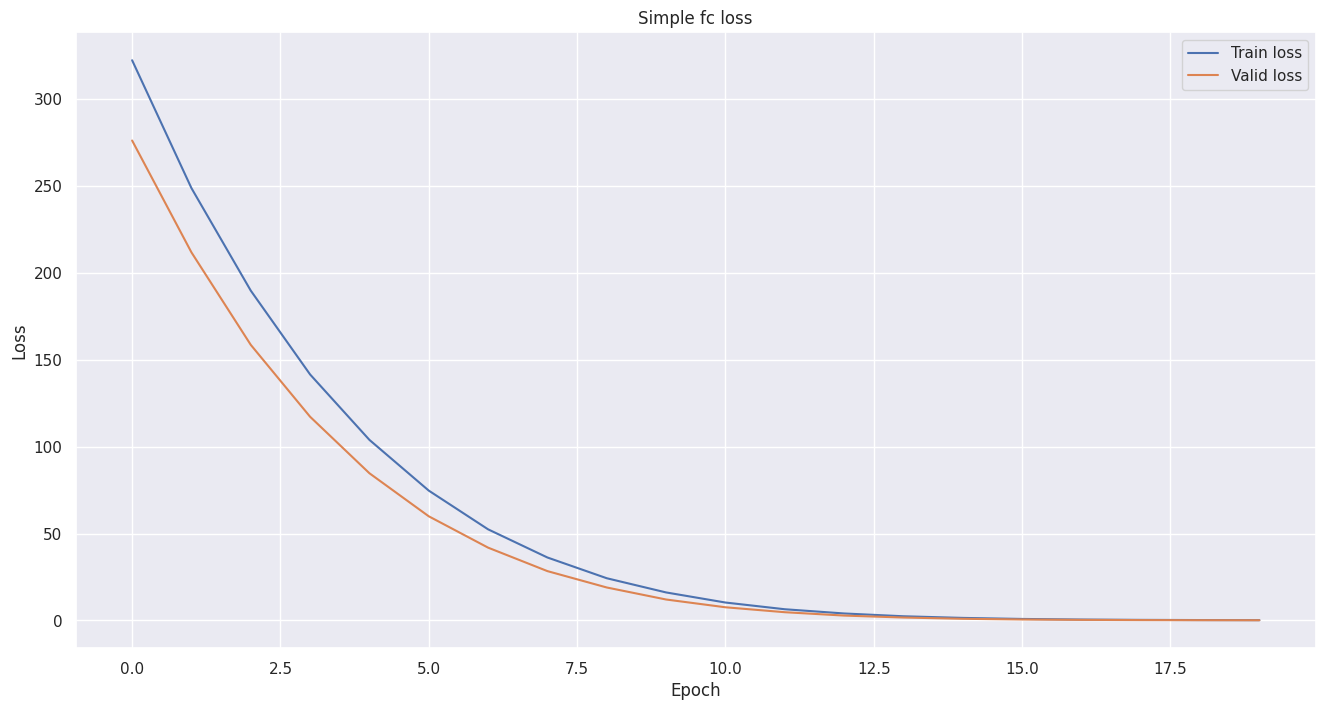

In [107]:
fit(model, train_loader, valid_loader, optimizer, loss_fn, 20, 'Simple fc')

## BatchNorm и Dropout

In [109]:
dropout = nn.Dropout(p=0.1)

dropout

Dropout(p=0.1, inplace=False)

In [110]:
x = torch.rand(3, 7)

x

tensor([[0.4692, 0.5289, 0.1251, 0.2366, 0.5250, 0.1004, 0.7477],
        [0.5762, 0.5053, 0.4679, 0.9223, 0.9563, 0.7441, 0.7483],
        [0.2576, 0.7044, 0.1618, 0.7161, 0.1450, 0.4973, 0.8624]])

In [111]:
x / 0.9

tensor([[0.5213, 0.5877, 0.1389, 0.2628, 0.5834, 0.1115, 0.8307],
        [0.6402, 0.5614, 0.5199, 1.0248, 1.0626, 0.8268, 0.8315],
        [0.2862, 0.7827, 0.1798, 0.7957, 0.1611, 0.5525, 0.9582]])

In [112]:
dropout.train()

for _ in range(3):
    print(dropout(x))

tensor([[0.0000, 0.5877, 0.1389, 0.2628, 0.0000, 0.1115, 0.8307],
        [0.6402, 0.5614, 0.5199, 1.0248, 1.0626, 0.8268, 0.8315],
        [0.2862, 0.7827, 0.1798, 0.7957, 0.1611, 0.5525, 0.9582]])
tensor([[0.5213, 0.5877, 0.1389, 0.0000, 0.5834, 0.1115, 0.8307],
        [0.6402, 0.5614, 0.5199, 1.0248, 1.0626, 0.8268, 0.8315],
        [0.2862, 0.7827, 0.1798, 0.7957, 0.1611, 0.0000, 0.9582]])
tensor([[0.5213, 0.5877, 0.1389, 0.2628, 0.5834, 0.1115, 0.8307],
        [0.6402, 0.5614, 0.5199, 1.0248, 1.0626, 0.8268, 0.8315],
        [0.2862, 0.7827, 0.1798, 0.7957, 0.1611, 0.5525, 0.0000]])


In [114]:
x

tensor([[0.4692, 0.5289, 0.1251, 0.2366, 0.5250, 0.1004, 0.7477],
        [0.5762, 0.5053, 0.4679, 0.9223, 0.9563, 0.7441, 0.7483],
        [0.2576, 0.7044, 0.1618, 0.7161, 0.1450, 0.4973, 0.8624]])

In [113]:
dropout.eval()

dropout(x)

tensor([[0.4692, 0.5289, 0.1251, 0.2366, 0.5250, 0.1004, 0.7477],
        [0.5762, 0.5053, 0.4679, 0.9223, 0.9563, 0.7441, 0.7483],
        [0.2576, 0.7044, 0.1618, 0.7161, 0.1450, 0.4973, 0.8624]])

In [115]:
batch_norm = nn.BatchNorm1d(num_features=7)

batch_norm

BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [116]:
x = torch.rand(3, 7)

x

tensor([[0.6941, 0.6341, 0.8651, 0.7624, 0.6475, 0.3255, 0.2580],
        [0.3764, 0.7386, 0.2278, 0.6366, 0.9375, 0.9234, 0.1319],
        [0.6425, 0.8269, 0.0458, 0.8196, 0.1885, 0.1385, 0.2881]])

In [117]:
batch_norm(x)

tensor([[ 0.8840, -1.2566,  1.3822,  0.2989,  0.1829, -0.4090,  0.4729],
        [-1.3976,  0.0685, -0.4320, -1.3455,  1.1230,  1.3769, -1.3893],
        [ 0.5136,  1.1881, -0.9501,  1.0465, -1.3058, -0.9678,  0.9163]],
       grad_fn=<NativeBatchNormBackward0>)

In [118]:
batch_norm.weight

Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1.], requires_grad=True)

In [119]:
batch_norm.bias

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [120]:
batch_norm.running_mean

tensor([0.0571, 0.0733, 0.0380, 0.0740, 0.0591, 0.0462, 0.0226])

In [121]:
batch_norm.running_var

tensor([0.9029, 0.9009, 0.9185, 0.9009, 0.9143, 0.9168, 0.9007])

In [122]:
batch_norm.num_batches_tracked

tensor(1)

In [123]:
batch_norm(x)

batch_norm.num_batches_tracked

tensor(2)

In [124]:
batch_norm.eval()

batch_norm(x)

tensor([[ 0.6485,  0.5491,  0.8626,  0.6903,  0.5850,  0.2590,  0.2388],
        [ 0.2966,  0.6652,  0.1694,  0.5506,  0.9018,  0.9106,  0.0987],
        [ 0.5913,  0.7632, -0.0286,  0.7537,  0.0832,  0.0552,  0.2721]],
       grad_fn=<NativeBatchNormBackward0>)

In [125]:
x

tensor([[0.6941, 0.6341, 0.8651, 0.7624, 0.6475, 0.3255, 0.2580],
        [0.3764, 0.7386, 0.2278, 0.6366, 0.9375, 0.9234, 0.1319],
        [0.6425, 0.8269, 0.0458, 0.8196, 0.1885, 0.1385, 0.2881]])

In [126]:
batch_norm = nn.BatchNorm1d(num_features=7)

batch_norm.eval()

batch_norm(x)

tensor([[0.6941, 0.6341, 0.8651, 0.7624, 0.6475, 0.3255, 0.2580],
        [0.3764, 0.7386, 0.2278, 0.6366, 0.9374, 0.9234, 0.1319],
        [0.6425, 0.8269, 0.0458, 0.8196, 0.1885, 0.1385, 0.2881]],
       grad_fn=<NativeBatchNormBackward0>)